<a href="https://colab.research.google.com/github/KodumuruRaja/Exploratory-Data-Analysis-EDA-/blob/main/EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [ ]:
data1=pd.read_csv("/content/drive/MyDrive/ipl_analysis.zip (Unzipped Files)/ipl/matches.csv")
data2=pd.read_csv("/content/drive/MyDrive/ipl_analysis.zip (Unzipped Files)/ipl/deliveries.csv")

In [ ]:
data1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
data2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
data2['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [ ]:
data3=data2[data2['dismissal_kind']=='stumped']['fielder'].value_counts().reset_index()

In [ ]:
data3.rename(columns={'index':'wicket_keeper','fielder':'stumping'},inplace=True)

In [ ]:
data3.head()

,wicket_keeper,stumping
0,RV Uthappa,32
1,MS Dhoni,30
2,KD Karthik,26
3,WP Saha,17
4,AC Gilchrist,16


In [ ]:
data4=data3['wicket_keeper'].tolist()

In [ ]:
data4

['RV Uthappa',
 'MS Dhoni',
 'KD Karthik',
 'WP Saha',
 'AC Gilchrist',
 'PA Patel',
 'NV Ojha',
 'KC Sangakkara',
 'AB de Villiers',
 'MS Bisla',
 'SP Goswami',
 'KM Jadhav',
 'BB McCullum',
 'AP Tare',
 'DH Yagnik',
 'Kamran Akmal',
 'CM Gautam',
 'YV Takawale',
 'KL Rahul',
 'SV Samson',
 'PR Shah',
 'MV Boucher',
 'RR Pant',
 'Q de Kock',
 'M Rawat',
 'Vishnu Vinod',
 'DJ Jacobs',
 'N Saini',
 'KB Arun Karthik',
 'AT Rayudu',
 'Gurkeerat Singh',
 'KH Devdhar']

In [ ]:
data4=data2[(data2['dismissal_kind']=='caught')&(data2['fielder'].isin(data4))]['fielder'].value_counts().reset_index()

In [ ]:
data4.rename(columns={'index':'wicket_keeper','fielder':'catches'},inplace=True)

In [ ]:
data4.head()

,wicket_keeper,catches
0,KD Karthik,88
1,AB de Villiers,81
2,MS Dhoni,76
3,RV Uthappa,75
4,NV Ojha,65


In [ ]:
data5=pd.merge(data3,data4,on='wicket_keeper',how='outer')

In [ ]:
data5.catches=data5.catches.fillna(0)

In [ ]:
data5.catches=data5.catches.astype(int)

In [ ]:
data5['total']=data5.stumping+data5.catches

In [ ]:
data5=data5.sort_values(['total'],ascending=False).reset_index()

In [ ]:
data5.drop('index',axis=1,inplace=True)

In [ ]:
data5.head()

,wicket_keeper,stumping,catches,total
0,KD Karthik,26,88,114
1,RV Uthappa,32,75,107
2,MS Dhoni,30,76,106
3,AB de Villiers,7,81,88
4,NV Ojha,10,65,75


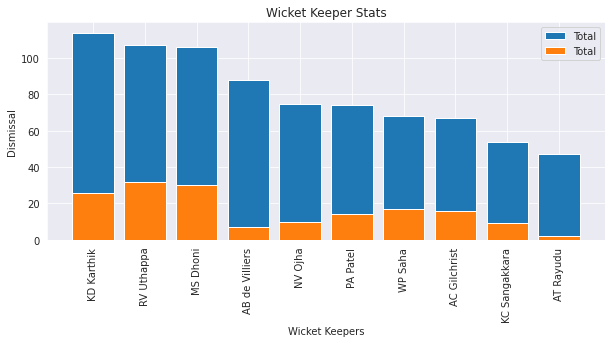

In [ ]:
data5_top10=data5.head(10)
plt.figure(figsize=(10,4))
plt.bar(data5_top10['wicket_keeper'],data5_top10['total'],label='Total')
plt.bar(data5_top10['wicket_keeper'],data5_top10['stumping'],label='Total')
plt.xticks(rotation=90)
plt.title('Wicket Keeper Stats')
plt.xlabel('Wicket Keepers')
plt.ylabel('Dismissal')
plt.legend(loc='upper right')
plt.show()

In [ ]:
data6=data1[['city','toss_decision','toss_winner','winner']]
def get_unique_cities(df):
  city_dict=df.groupby(['city']).groups
  city_list=[]
  for city,stats in city_dict.items():
    city_list.append(city)
  print(city_list)
get_unique_cities(data6)

['Abu Dhabi', 'Ahmedabad', 'Bangalore', 'Bloemfontein', 'Cape Town', 'Centurion', 'Chandigarh', 'Chennai', 'Cuttack', 'Delhi', 'Dharamsala', 'Durban', 'East London', 'Hyderabad', 'Indore', 'Jaipur', 'Johannesburg', 'Kanpur', 'Kimberley', 'Kochi', 'Kolkata', 'Mumbai', 'Nagpur', 'Port Elizabeth', 'Pune', 'Raipur', 'Rajkot', 'Ranchi', 'Sharjah', 'Visakhapatnam']


In [ ]:
data6.winner.isna().sum()

3

In [ ]:
data6=data6[pd.notnull(data6['winner'])]
data6.winner.isna().sum()

0

In [ ]:
data6.count()

city             626
toss_decision    633
toss_winner      633
winner           633
dtype: int64

In [ ]:
data6[data6['city'].isna()]

,city,toss_decision,toss_winner,winner
461,NaN,field,Royal Challengers Bangalore,Royal Challengers Bangalore
462,NaN,bat,Kolkata Knight Riders,Delhi Daredevils
466,NaN,field,Rajasthan Royals,Chennai Super Kings
468,NaN,bat,Sunrisers Hyderabad,Sunrisers Hyderabad
469,NaN,bat,Mumbai Indians,Chennai Super Kings
474,NaN,field,Kings XI Punjab,Kings XI Punjab
476,NaN,field,Mumbai Indians,Sunrisers Hyderabad


In [ ]:
data6=data6[pd.notnull(data6['city'])]
data6.city.isna().sum()

0

In [ ]:
data6.count()

city             626
toss_decision    626
toss_winner      626
winner           626
dtype: int64

In [ ]:
def decision(row):
  if row['toss_winner']==row['winner']:
    val=row['toss_decision']
  else:
    if row['toss_decision']=='bat':
      val='field'
    else:
      val='bat'
  return val

In [ ]:
data6['decision']=data6.apply(decision,axis=1)
data6.head()

,city,toss_decision,toss_winner,winner,decision
0,Hyderabad,field,Royal Challengers Bangalore,Sunrisers Hyderabad,bat
1,Pune,field,Rising Pune Supergiant,Rising Pune Supergiant,field
2,Rajkot,field,Kolkata Knight Riders,Kolkata Knight Riders,field
3,Indore,field,Kings XI Punjab,Kings XI Punjab,field
4,Bangalore,bat,Royal Challengers Bangalore,Royal Challengers Bangalore,bat


In [ ]:
data6=data6[['city','decision']]
data6.head()

,city,decision
0,Hyderabad,bat
1,Pune,field
2,Rajkot,field
3,Indore,field
4,Bangalore,bat


In [ ]:
data7=pd.get_dummies(data6.decision)
data7.head()

,bat,field
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [ ]:
data6=pd.concat([data6,data7],axis=1)
data6.drop(['decision'],axis=1,inplace=True)
data6.head()

,city,bat,field
0,Hyderabad,1,0
1,Pune,0,1
2,Rajkot,0,1
3,Indore,0,1
4,Bangalore,1,0


In [ ]:
data6=data6.groupby('city').sum().reset_index()

In [ ]:
data6['total']=data6.bat+data6.field

In [ ]:
data6['bat_decision']=round(((data6.bat)/data6.total)*100,2)

In [ ]:
data6['field_decision']=round(((data6.field)/data6.total)*100,2)

In [ ]:
data6.head()

,city,bat,field,total,bat_decision,field_decision
0,Abu Dhabi,4,3,7,57.14,42.86
1,Ahmedabad,6,6,12,50.00,50.00
2,Bangalore,27,37,64,42.19,57.81
3,Bloemfontein,1,1,2,50.00,50.00
4,Cape Town,5,2,7,71.43,28.57


In [ ]:
data6.drop(['bat','field','total'],axis=1,inplace=True)

In [ ]:
data6

,city,bat_decision,field_decision
0,Abu Dhabi,57.14,42.86
1,Ahmedabad,50.00,50.00
2,Bangalore,42.19,57.81
3,Bloemfontein,50.00,50.00
4,Cape Town,71.43,28.57
5,Centurion,33.33,66.67
6,Chandigarh,43.48,56.52
7,Chennai,64.58,35.42
8,Cuttack,57.14,42.86
9,Delhi,45.76,54.24


In [ ]:
data8=data2[['bowler','dismissal_kind']]

In [ ]:
data8=data8[(data8.dismissal_kind.isin(['caught','bowled','lbw','caught and bowled','stumped']))]

In [ ]:
data8=data8.groupby('bowler').count().reset_index()

In [ ]:
data8.rename(columns={'dismissal_kind':'no_wickets'},inplace=True)

In [ ]:
data8=data8.sort_values(by='no_wickets',ascending=False)

In [ ]:
data8=data8[(data8.no_wickets>=100)]

In [ ]:
data8

,bowler,no_wickets
255,SL Malinga,154
5,A Mishra,134
200,PP Chawla,126
104,Harbhajan Singh,126
78,DJ Bravo,122
44,B Kumar,111
7,A Nehra,106
215,R Vinay Kumar,103
309,Z Khan,102
205,R Ashwin,100


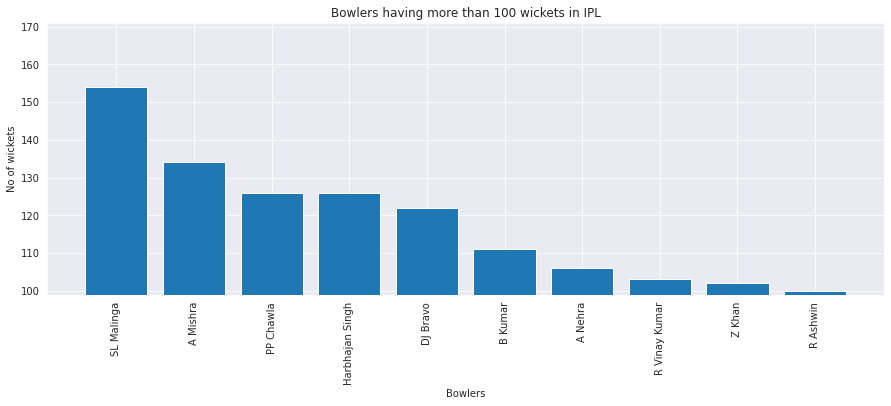

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(data8.bowler,data8.no_wickets)
plt.xticks(rotation=90)
plt.ylim(99,171)
plt.title('Bowlers having more than 100 wickets in IPL')
plt.xlabel('Bowlers')
plt.ylabel('No of wickets')
plt.show()

In [ ]:
data9=pd.DataFrame(data1[(data1.result!='no result')&(data1.dl_applied==0)][['id','season']])

In [ ]:
data9.rename(columns={'id':'match_id'},inplace=True)

In [ ]:
data10=pd.merge(data9,data2,on='match_id',how='inner')

In [ ]:
data10=data10[(data10.is_super_over!=1)].groupby(['match_id','inning']).sum().sort_values(by='total_runs',ascending=True).reset_index()[['match_id','inning','total_runs']]

In [ ]:
data10=data10[data10.inning<=2]

In [ ]:
data10.rename(columns={'match_id':'id'},inplace=True)

In [ ]:
data11=data10.head(10)

In [ ]:
data11

,id,inning,total_runs
0,27,2,49
1,119,2,58
2,44,2,66
3,35,1,67
4,99,1,67
5,35,2,68
6,99,2,68
7,471,1,70
8,471,2,71
9,54,1,73


In [ ]:
data12=data10.tail(10)

In [ ]:
data12

,id,inning,total_runs
1224,580,1,227
1225,50,1,230
1226,486,1,231
1227,259,1,231
1228,296,1,232
1229,562,1,235
1230,61,1,240
1231,206,1,246
1232,620,1,248
1233,411,1,263


In [ ]:
data11=pd.merge(data11,data1,on='id',how='inner')[['season','inning','team1','team2','toss_winner','toss_decision','total_runs']]

In [ ]:
data12=pd.merge(data12,data1,on='id',how='inner')[['season','inning','team1','team2','toss_winner','toss_decision','total_runs']].sort_values(by='total_runs',ascending=False)

In [ ]:
data11

,season,inning,team1,team2,toss_winner,toss_decision,total_runs
0,2017,2,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,49
1,2009,2,Royal Challengers Bangalore,Rajasthan Royals,Royal Challengers Bangalore,bat,58
2,2017,2,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,66
3,2017,1,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,67
4,2017,2,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,68
5,2008,1,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,67
6,2008,2,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,68
7,2014,1,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,70
8,2014,2,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,71
9,2017,1,Kings XI Punjab,Rising Pune Supergiant,Rising Pune Supergiant,field,73


In [ ]:
def score_format(df):
    scoring_team = ""
    against = ""
    if(df.toss_decision == 'field'):
        if(df.inning == 1):
            if(df.toss_winner!=df.team1):
                scoring_team = df.team1
                against=df.team2
            else:
                scoring_team = df.team2
                against=df.team1
        else:
            if(df.toss_winner==df.team1):
                scoring_team = df.team1
                against=df.team2
            else:
                scoring_team = df.team2
                against=df.team1
    else:
        if(df.inning == 1):
            if(df.toss_winner==df.team1):
                scoring_team = df.team1
                against=df.team2
            else:
                scoring_team = df.team2
                against=df.team1
        else:
            if(df.toss_winner!=df.team1):
                scoring_team = df.team1
                against=df.team2
            else:
                scoring_team = df.team2
                against=df.team1
    return scoring_team,against

In [ ]:
data11['low_scoring_team'] = data11.apply(lambda row : score_format(row)[0], axis = 1)
data11['against'] = data11.apply(lambda row : score_format(row)[1], axis = 1)

In [ ]:
data12['high_scoring_team'] = data12.apply(lambda row : score_format(row)[0], axis = 1)
data12['against'] = data12.apply(lambda row : score_format(row)[1], axis = 1)

In [ ]:
data11=data11[['low_scoring_team','against','total_runs','season']]

In [ ]:
data11

,low_scoring_team,against,total_runs,season
0,Royal Challengers Bangalore,Kolkata Knight Riders,49,2017
1,Rajasthan Royals,Royal Challengers Bangalore,58,2009
2,Delhi Daredevils,Mumbai Indians,66,2017
3,Delhi Daredevils,Kings XI Punjab,67,2017
4,Kings XI Punjab,Delhi Daredevils,68,2017
5,Kolkata Knight Riders,Mumbai Indians,67,2008
6,Mumbai Indians,Kolkata Knight Riders,68,2008
7,Royal Challengers Bangalore,Rajasthan Royals,70,2014
8,Rajasthan Royals,Royal Challengers Bangalore,71,2014
9,Kings XI Punjab,Rising Pune Supergiant,73,2017


In [ ]:
data12=data12[['high_scoring_team','against','total_runs','season']]

In [ ]:
data12

,high_scoring_team,against,total_runs,season
9,Royal Challengers Bangalore,Pune Warriors,263,2013
8,Royal Challengers Bangalore,Gujarat Lions,248,2016
7,Chennai Super Kings,Rajasthan Royals,246,2010
6,Chennai Super Kings,Kings XI Punjab,240,2008
5,Royal Challengers Bangalore,Mumbai Indians,235,2015
4,Kings XI Punjab,Royal Challengers Bangalore,232,2011
2,Kings XI Punjab,Chennai Super Kings,231,2014
3,Delhi Daredevils,Kings XI Punjab,231,2011
1,Kings XI Punjab,Mumbai Indians,230,2017
0,Royal Challengers Bangalore,Sunrisers Hyderabad,227,2016


In [ ]:
data13=data2.groupby(['match_id','inning']).sum()['total_runs'].reset_index().groupby('match_id').sum()['total_runs'].reset_index()

In [ ]:
data13['average_runs']=data13['total_runs']/2

In [ ]:
data13.drop('total_runs',axis=1,inplace=True)

In [ ]:
data9=data1[['id','season']]

In [ ]:
data9=data9.rename(columns={'id':'match_id'})

In [ ]:
data13=pd.merge(data9,data13,on='match_id',how='inner')

In [ ]:
data13.drop('match_id',axis=1,inplace=True)

In [ ]:
data14=data13.groupby('season').mean().reset_index()

In [ ]:
data14.average_runs=round(data14.average_runs).astype(int)

In [ ]:
data14

,season,average_runs
0,2008,155
1,2009,143
2,2010,157
3,2011,145
4,2012,152
5,2013,149
6,2014,158
7,2015,156
8,2016,157
9,2017,159


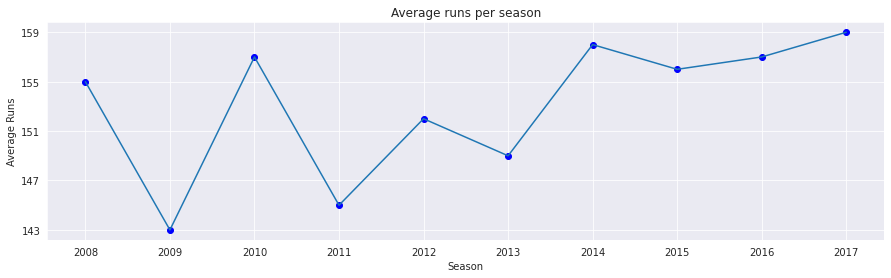

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(data14.season,data14.average_runs,'bo')
plt.plot(data14.season,data14.average_runs)
plt.title("Average runs per season")
plt.xlabel("Season")
plt.ylabel("Average Runs")
plt.xticks(np.arange(np.min(data14.season), np.max(data14.season)+1, step=1)) 
plt.yticks(np.arange(np.min(data14.average_runs), np.max(data14.average_runs)+1, step=4))
plt.show()